<a href="https://colab.research.google.com/github/Sergei-N-Fedorov/Data_Analysis/blob/main/Sergei_Fedorov_DAKD_2025_exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block" style="color: green">
    <h1><center> DAKD 2025 EXERCISE 2: SUPERVISED LEARNING  </center></h1>

### Fill in your name, student id number and email address
#### name:  Sergei Fedorov
#### student id:  2511405
#### email:  sergei.s.fedorov@utu.fi


<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, we will use the Cardio data that was mostly cleaned up. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should never forget it in your future data analyses</i>.

-----

#### General Guidance for Exercises

- <b>Complete all tasks:</b> Make sure to answer all questions, even if you cannot get your script to fully work.

- <b>Code clarity:</b> Write clear and readable code. Include comments to explain what your code does.

- <b>Effective visualizations:</b> Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.

- <b>Notebook organization:</b> You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.

- <b>Submission:</b> Submit both the .ipynb and .html or .pdf versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.

- <b>Quiz:</b> After completing the notebook, you should complete the second exercise quiz in Moodle. Please do not attempt it before doing the notebook, as the questions directly relate to the results you will obtain from it.

- <b>Grading criteria:</b>
    
    - The grading scale is *Fail*/*Pass*/*Pass with honors* (+1).
    
    - To pass, you must complete the required parts and score at least 80% on the quiz. Please note that notebooks may also be checked.
    
    - To achieve Pass with honors, also complete the bonus exercises.

- <b>Technical issues:</b>
    
    - If you encounter problems, start with an online search to find solutions but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
    
    - Cite all external sources used, whether for code or explanations.
    
    - If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email at ankazl@utu.fi, zoher.orabe@utu.fi.

- <b>Use of AI and large language models:</b>
    
    - We do not encourage the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
    
    - Describe how you used the AI tools in your work, including your input and how the output was beneficial.

- <b>Time management:</b> Do not leave your work until the last moment. No feedback will be available during weekends.

- <b>Additional notes:</b>
    
    - You can find the specific deadlines and session times for each assignment on the Moodle course page.
    
    - Ensure all your answers are concise—typically a few sentences per question.
    
    - Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.

<font color = green> The guided exercise session is held on the 3th of December at 14:15-16:00, at lecture hall X, Natura building.</font>

<font color = red size = 4>The deadline is the 8th of December at 23:55</font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### <font color = red> Packages needed for this exercise: </font>

You can use other packages as well, but this excercise can be completed with those below.


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold # Added for cross-validation in Ridge Regression

# Show the plots inline in the notebook
%matplotlib inline

import numpy as np
import random

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold # Added for cross-validation in Ridge Regression


# ------------------------------------
# This is NOT necessary, but can be used for better readability of prints

class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   # Ends the styling
   END = '\033[0m'

# And to use this, simply just create it and call the variable you need as
print(color.UNDERLINE + 'This' + color.END,
      color.GREEN + 'is',
      color.RED + 'just',
      color.GREEN + 'an',
      color.BOLD + 'example' + color.END,
      color.RED + ':)'
)


# 2️⃣ Load data # Will be loaded in Part 4
# cancerData = pd.read_csv('prostate.csv')  # assuming tab-separated


This is just an example :)


### <font color = red> Data needed for this exercise: </font>

You can download the two datasets (Cardio and Prostate) required to complete the notebook from Moodle under the Exercise II section.

### <font color = red> Reproducibility </font>

Before the exercise itself, we might as well discuss about the reproducibility of experiments we conduct in research. It can be quite a nightmare for some if code spewed out only random results.
To address this, we can set a **random seed** to ensure that any random processes, such as splitting our dataset into training and test sets, yield consistent results across multiple runs. By using a fixed random seed, we enhance the reproducibility of our experiments, making it easier to validate findings.
We will use the random seed <font color = red>2025</font>. For stable results and to obtain the correct quiz answers, please <font color = red> do not </font> use any other random seed anywhere in your code.


In [2]:
np.random.seed(2025)
random.seed(2025)

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font>

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is a classic supervised machine learning technique based on the assumption that data points with similar features tend to belong to the same class, and thus are likely to be near each other in feature space.

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`. Let's have a brief look at the features again:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in years
| sex | binary | Female == 0, Male == 1
| weight | numeric | Measured weight of the patient (kg)
| height | numeric | Measured height of the patient (cm)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| alco | binary | A subjective feature based on asking the patient whether or not he/she consumes alcohol
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| gluc | categorical | Glucose associated risk information evaluated by a doctor

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

####**Exercise 1 A)**

Before starting with the algorithm, perform some data exploration and determine the following characteristics of the data:

(1) What is the total number of data samples?

(2) How many distinct classes (target categories) does the dataset contain?

(3) Which person (their index) is the heaviest in the dataset?

(4) Which feature in the dataset has the largest range (max–min)?

Take a random sample of 1000 rows from the dataframe using a fixed random seed (<b>of 2025</b>). Print the first 15 rows to check that everything is ok with the dataframe.



In [3]:
### Data Loading and Exploration
# ------------------------------------------------------
# The data file should be at the same location than the
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file
cardio_data = pd.read_csv(data_path)

# For this task, we are going to use ALL variables but CARDIO as features, and CARDIO as label.

cardio_data.head(12)


,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_at_risk,cholesterol_elevated,gluc_normal,gluc_at_risk,gluc_elevated
0,48,1,170,104.0,120,80,0,0,1,0,1,0,0,1,0,0
1,51,0,160,59.0,110,80,0,0,1,0,0,1,0,1,0,0
2,42,1,166,77.0,120,80,0,0,1,0,1,0,0,1,0,0
3,55,0,168,80.0,120,80,0,0,1,0,1,0,0,1,0,0
4,57,0,154,41.0,806,0,0,0,1,0,1,0,0,1,0,0
5,53,0,152,56.0,103,65,0,0,1,0,1,0,0,1,0,0
6,42,0,167,67.0,110,70,0,0,1,0,1,0,0,1,0,0
7,41,1,172,70.0,110,80,0,0,1,0,1,0,0,1,0,0
8,43,1,169,67.0,100,80,0,0,1,0,1,0,0,1,0,0
9,39,1,168,60.0,120,80,0,0,1,0,1,0,0,0,1,0


In [4]:
# Find the following specs of the data:
# (1) What is the total number of data samples?
print("Shape: ", cardio_data.shape, "\n")

# (2) How many distinct classes (target categories) does the dataset contain?
display(cardio_data['cardio'].value_counts())

# (3) Which person (their index) is the heaviest in the dataset?
print("\nHeaviest patient", cardio_data['weight'].idxmax(), "has weight", cardio_data['weight'].max(), "kg\n")

# (4) Which feature in the dataset has the largest range (max–min)?
display(cardio_data.select_dtypes(include="number").max() - cardio_data.select_dtypes(include="number").min())

Shape:  (6000, 16) 



,count
cardio,
0,4200
1,1800



Heaviest patient 5912 has weight 168.0 kg



,0
age,35.0
sex,1.0
height,130.0
weight,140.0
ap_hi,14009.0
ap_lo,9800.0
smoke,1.0
alco,1.0
active,1.0
cardio,1.0


In [5]:
# Checking actual maximums and minimums
cardio_data.describe().round(1)
display(cardio_data.select_dtypes(include="number").agg(['min', 'max']).T)

,min,max
age,29.0,64.0
sex,0.0,1.0
height,68.0,198.0
weight,28.0,168.0
ap_hi,11.0,14020.0
ap_lo,0.0,9800.0
smoke,0.0,1.0
alco,0.0,1.0
active,0.0,1.0
cardio,0.0,1.0


####<font color = lightcoral> \<Answer\> </font>

(1) There is in total 6000 data points.

(2) The target variable has 2 categories (0/1).
Apparently, these values mean absence/presense of the disease.

(3) The person with the largest weight has index 5912.

(4) The largest range in the dataset belongs to `ap_hi` variable but it is obviously due to incorrect values.
Anyway, since the features are of different nature, it probably doesn't make much sense to look for the maximum range, except to find inconsistencies.

<!-- END -->

In [6]:
# As the notebook may be too slow to run for the full dataset, we will only use 1000 samples
# from the original data

# Resample with pandas.DataFrame.sample with random_state=2025 and print first 15 rows


cardio_data = pd.DataFrame.sample(cardio_data, n=1000, random_state=2025)
cardio_data.head(15)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_at_risk,cholesterol_elevated,gluc_normal,gluc_at_risk,gluc_elevated
2138,52,0,162,67.0,130,80,0,0,1,0,0,0,1,0,0,1
979,44,0,161,59.0,110,70,0,0,1,0,1,0,0,1,0,0
2801,53,0,159,84.0,120,80,0,0,1,0,1,0,0,1,0,0
298,39,0,150,65.0,120,90,0,0,0,0,1,0,0,1,0,0
2689,59,0,164,66.0,160,90,0,0,1,0,0,1,0,1,0,0
3661,44,1,176,72.0,120,80,0,0,0,0,1,0,0,1,0,0
866,63,0,160,63.0,130,100,0,0,1,0,0,1,0,1,0,0
4949,55,0,160,100.0,120,80,0,0,1,1,1,0,0,1,0,0
2351,50,0,167,73.0,130,80,0,0,0,0,1,0,0,1,0,0
1580,58,0,161,82.0,120,80,0,0,1,0,1,0,0,1,0,0


----

We have the data so now, let's put it to use. All the analyses will be done based on this sample of 1000.

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.


#### **Exercise 1 B)**

Gather the features into one array and the target variable into another array. Create training and test data by splitting the data into training (80%) and test (20%) sets. Use a fixed random seed to ensure that even if you execute this cell hundreds of times, you will get the same split each time.

- Do you need stratification for our dataset? Explain your decision.

In [7]:
###Train-test split

# As we are going to use ALL THE OTHER BUT CARDIO as features, we can drop the cardio column like this
features = cardio_data.drop(columns=['cardio'])

# and as labels, basically just choose the cardio column as follows
labels = cardio_data['cardio']

# WHY STRATIFICATION is needed/not needed?
# Inspect the labels and their distribution.
display(labels.value_counts())


,count
cardio,
0,699
1,301


In [8]:
# ------- TRAIN-TEST SPLIT
# Use sklearn.model_selection.train_test_split() function with random_state=2025

### Yor Code Goes Here
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            random_state=2025,
                                                                            test_size=0.2,
                                                                            train_size=0.8,
                                                                            shuffle=True,
                                                                            stratify=labels)

####<font color = lightcoral> \<Answer\> </font>

Stratification is needed because the data sample is imbalanced in the sense that label `0` is 2.3 times more frequent than label `1`, which are about 30% of all datapoints. It is possible that without stratification the majority of `1`s would go to the test set while the training set would represent a wrong distribution of labels (`1`s would be underrepresented).

<!-- END -->

----------

####**Exercise 1 C)**

Standardize the numerical features in both the train and test sets.

- Explain how the k-NN model makes predictions about whether or not a patient has cardiovascular disease (CVD) when the features are not standardized. Specifically, discuss how the varying scales of different features can influence the model's predictions, and how standardization would change this influence.


*Note: Some good information about preprocessing and how to use it for train and test data can be found here https://scikit-learn.org/stable/modules/preprocessing.html*

In [9]:
### Standardization

# We wanted to scale only the numeric variables so we can have them in a list as
numeric_features = ['age', 'weight', 'height', 'ap_hi', 'ap_lo']

# We will use the standard Z-score standardization by scikit-learn. Only one scaler needed here!
scaler = StandardScaler()

# --- first, Normalize the training set (features_train)

# Fit a StandardScaler and scale the data using the computed mean and std
scaled_features_train = features_train.copy()
scaled_features_train[numeric_features] = (scaled_features_train[numeric_features].astype(float))

### Fitting the scaler and transforming the train set
scaler.fit(scaled_features_train[numeric_features])
scaled_features_train[numeric_features] = scaler.transform(scaled_features_train[numeric_features])

# then the test set (features_test)
# USE THE ALREADY FITTED STANDARDSCALER HERE
scaled_features_test = features_test.copy()
scaled_features_test[numeric_features] = (scaled_features_test[numeric_features].astype(float))

### Transforming the test set
scaled_features_test[numeric_features] = scaler.transform(scaled_features_test[numeric_features])


####<font color = lightcoral> \<Answer\> </font>

The model takes $k$ datapoints that are the closest to a new point and decide the label for the new point based on the labels of those $k$ points (taking the most frequent label among them).
Hence, the model needs a notion of distance between points, which has a natural (Euclidean) implementation for numeric variables.

So, when the features are not standardized and have significantly different scales and ranges, they affect distance calculation in different ways.
In particular, a feature with larger variance contributes more into distances than a feature with smaller variance.

For example, we have ages in range 29–64 and heights in range 68–198. And two persons of the same height but with 5 year difference in age are closer to each other than two persons of the same age but having 7 cm difference in their heights. At the same time, in reality, age difference seems to have higher importance for health conditions than the height does.

Standardizing makes the features' contribution potentially equal by reducing their variance to 1.

<!-- END -->

-------

It's time for us to train the model!

####**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.

- What does each cell in the confusion matrix represents in the context of our dataset?

- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.

- With our dataset, why should you be a little more cautious when interpreting the accuracy?

*Note: We are very aware that there are functions available for these metrics, but this time, please calculate them using the confusion matrix.*

In [10]:
### kNN classifier sklearn.neighbors.KNeighborsClassifier() with k = 3
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(scaled_features_train, labels_train)

# Predicted labels for the test set
predicted_labels = knn_model.predict(scaled_features_test)

# ---- Confusion matrix. Use sklearn.metrics.confusion_matrix() to build it
conf_matrix = metrics.confusion_matrix(labels_test, predicted_labels)
print("Confusion matrix:\n", conf_matrix)

# ----- Accuracy, precision and recall. Use previously built confusion matrix to calculate metrics
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / (conf_matrix[0,0] + conf_matrix[1,1] + conf_matrix[0,1] + conf_matrix[1,0])
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
print("\nFrom the confusion matrix:")
print(f'  Accuracy: {accuracy:.3f}')
print(f'  Precision: {precision:.3f}')
print(f'  Recall: {recall:.3f}')

# Compare the results you got to the baselines by sklearn.metrics:
print("\nFrom the metrics library:")
print(f'  Accuracy: {metrics.accuracy_score(labels_test, predicted_labels):.3f}')
print(f'  Precision: {metrics.precision_score(labels_test, predicted_labels):.3f}')
print(f'  Recall: {metrics.recall_score(labels_test, predicted_labels):.3f}')


Confusion matrix:
 [[115  25]
 [ 36  24]]

From the confusion matrix:
  Accuracy: 0.695
  Precision: 0.490
  Recall: 0.400

From the metrics library:
  Accuracy: 0.695
  Precision: 0.490
  Recall: 0.400


####<font color = lightcoral> \<Answer\> </font>

- The confusion matrix has at $i,j$ place, $0 \leq i, j \leq 1$, the number of datapoints from class $i$ classified to class $j$.
That is, in our (binary) case, it is
TN|FP
--|--
FN|TP

- The proportion of real positive labels should be about 30% (as in the whole dataset), but the model predicts 24.5% of inputs as positive (TP + FP).
This means that the model predicts the negative class better.
Probably, this follows from the fact that negative labels significantly prevail in the dataset.
The metrics indicate that the model predicts correctly in 69.5% of cases (accuracy).
From the points predicted as positive only 49% are really positive (precision).
The fraction of the points correctly predicted as positive in the class of all (truely) positive points is 40% (recall).

- The imbalancedness of the dataset influence the accuracy metric. On the one hand, the prevailing class makes prediction of belonging to it more frequent, as it was mentioned above.
But on the other hand, due to higher probability of the prevailing class (negatives in our case) the accuracy may show better figures than they are in reality just because negative "guesses" are more probably correct.
Especially misleading indications may occur when considering accuracy alone. In our case, while almost 70% accuracy may look good, but the other metrics show that the model is not much successful.  
It should be kept in mind also that a "dumb" model always predicting the negative label would have similar accuracy.

<!-- END -->

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

####**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the presense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire sample of 1000 on this task.

- **Exercise 2 A)** What can you say about the accuracy compared to the previous task?
- **Exercise 2 B)** What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This can certainly be done manually, but `cross_val_score` is also a very handy function.*

In [11]:
# Scaling again (for all sample without splitting)
#scaled_features = features.copy()
#scaled_features[numeric_features] = (scaled_features[numeric_features].astype(float))
#scaled_features[numeric_features] = scaler.transform(scaled_features[numeric_features])

# Combining back the train and test set to get 1000 datapoints
scaled_features = pd.concat([scaled_features_train, scaled_features_test], axis=0)

In [12]:
### Leave-one-out cross-validation

# Either manually loop through the LOOCV or use the optimized
# sklearn.model_selection.cross_val_score() function.

from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
acc = 0
for trn, tst in loo.split(scaled_features):
    knn_model.fit(scaled_features.iloc[trn], labels.iloc[trn])
    pred_label = knn_model.predict(scaled_features.iloc[tst])
    if (pred_label.item() == labels.iloc[tst].item()):
        acc += 1
print("Average accuracy: ", acc/len(labels))


Average accuracy:  0.612


<font color = royalblue> \<Answer\> </font>

A) The accuracy calculated as average success rate for all splittings is lower than previous one (61.2% against 69.5%).

B) It seems that 3NN model doesn't work well for this dataset. The cross-validation shows worse performance. At the same time, it should be more reliable evaluation than on the train/test split which may be more optimistic. This is because in LOOCV the result doesn't depend on the split quality.

<!-- END -->

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of $k$ for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters, such as the used distance measure. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of $k$, and use default values for all the other hyperparameters.

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

####**Exercise 3 A-C)**

Find the optimal $k$ value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the $k$ values. Again, you may use the entire sample of 1000 on this task. We recommend using the <i>sklearn.model_selection.GridSearchCV</i> function for it.

- **Exercise 3 A)** Which value of $k$ produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- **Exercise 3 B)** If the number of $k$ is still increased, what is the limit that the accuracy approaches? Why?
- **Exercise 3 C)** Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [26]:
### Selecting best model with GridSearchCV for LOOCV
param_choice = {'n_neighbors': range(1, 31)}
grid = GridSearchCV(estimator = KNeighborsClassifier(),
                    param_grid = param_choice,
                    cv = LeaveOneOut(),
                    scoring = 'accuracy')
grid.fit(scaled_features, labels)
grid_results = pd.DataFrame(grid.cv_results_)
print("The best value of k: ", grid.best_params_)
print("The value of accuracy for this k: ", grid.best_score_)


The best value of k:  {'n_neighbors': 30}
The value of accuracy for this k:  0.696


In [28]:
grid_results[['param_n_neighbors', 'mean_test_score', 'std_test_score']].head(30)

,param_n_neighbors,mean_test_score,std_test_score
0,1,0.578,0.493879
1,2,0.674,0.468747
2,3,0.612,0.487295
3,4,0.662,0.473029
4,5,0.635,0.481430
5,6,0.673,0.469117
6,7,0.644,0.478815
7,8,0.680,0.466476
8,9,0.665,0.471990
9,10,0.685,0.464516


In [31]:
### Distribution of labels in the sample
# display(labels.value_counts())
print("The fraction of negative labels (no disease): ", labels.value_counts()[0] / len(labels))

The fraction of negative labels (no disease):  0.699


####<font color = forestgreen> \<Answer\> </font>

**A)** The best accuracy is presented by the model with $k = 30$. It is 69.6% while for $k = 3$ we had accuracy 61.2%.

**B)** I think k-NN's accuracy when calculated as mean for LOOCV has its limit around 69.9%. It seems that the model is not good for this problem and its limitations are determined by the distribution of 0 and 1 in the labels. Because in the sample we have the fraction of 69.9% for the class with label 0, this would be the limit for the model performance.

**C)** The large number of neighbors makes the model performance better. The grow of accuracy gets very slow after about the middle of the $k$ range, though.
While $k = 1$ is a strikingly worse case, already $k = 2$ is not that bad compared to larger $k$.
An interesting fact is that the even values of $k$ are better than odd ones. This is perhaps due to the "voting" procedure where odd $k$ always gives a certain result while even $k$ requires additional calculations.

<!-- END -->

####Exercise 3 D-E)

Plot the accuracies as a function of $k$.

- **Exercise 3 D)** Plot accuracies against $k$.
- **Exercise 3 E)** Observe the line trend.

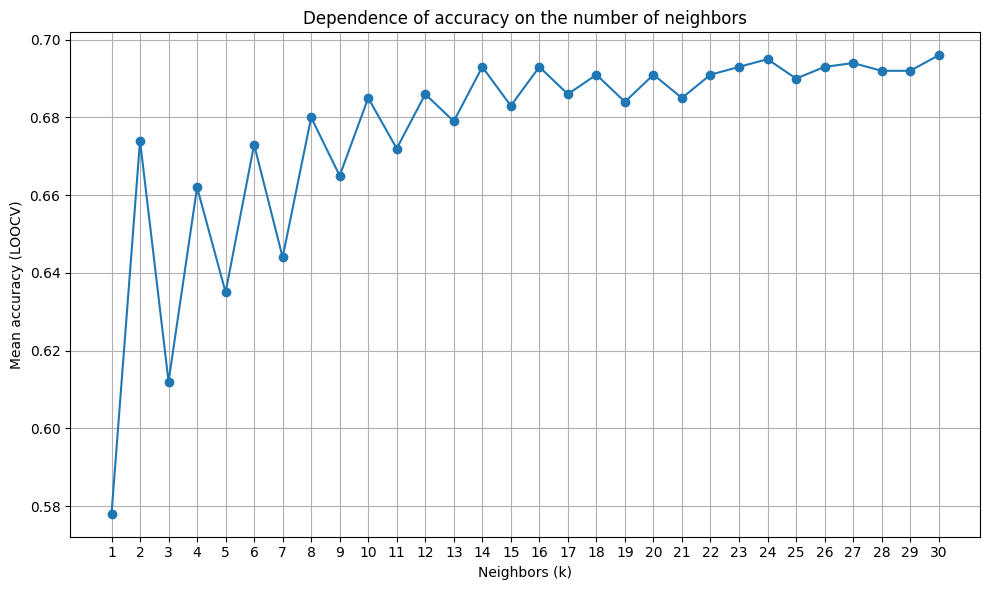

In [29]:
### Ploting mean accuracies against values of k
plt.figure(figsize=(10, 6))
plt.plot(grid_results['param_n_neighbors'], grid_results['mean_test_score'], marker='o', linestyle='-')
plt.title('Dependence of accuracy on the number of neighbors')
plt.xlabel('Neighbors (k)')
plt.ylabel('Mean accuracy (LOOCV)')
plt.xticks(grid_results['param_n_neighbors'])
plt.grid(True)
plt.tight_layout()

####<font color = forestgreen> \<Answer\> </font>

**D)** The plot is in the figure above.

**E)** As it was mentiond above, there is a visible difference in performance for even and odd values of $k$. We can consider them separately. But in both cases, we can see steady growing up to $k = 17$ (except for $k = 2$). After that, the graph begins to oscillate but keeps growing slighly on average.

<!-- END -->

####Exercise 3 F-G)

 What if the number of <i>k</i> still increases? Experiment with the <i>k</i> values of $201-230$

- **Exercise 3 F)** Plot accuracies against <i>k</i>.
- **Exercise 3 G)** Observe the line trend

In [32]:
# If the number of k still increases?
# ----- Let's try really large k values (200-231) and see what happens to the final accuracy

param_choice200 = {'n_neighbors': range(200, 232)}
grid200 = GridSearchCV(estimator = KNeighborsClassifier(),
                    param_grid = param_choice200,
                    cv = LeaveOneOut(),
                    scoring = 'accuracy')
grid200.fit(scaled_features, labels)
grid200_results = pd.DataFrame(grid200.cv_results_)
print("The best value of k: ", grid200.best_params_)
print("The value of accuracy for this k: ", grid200.best_score_)


The best value of k:  {'n_neighbors': 200}
The value of accuracy for this k:  0.699


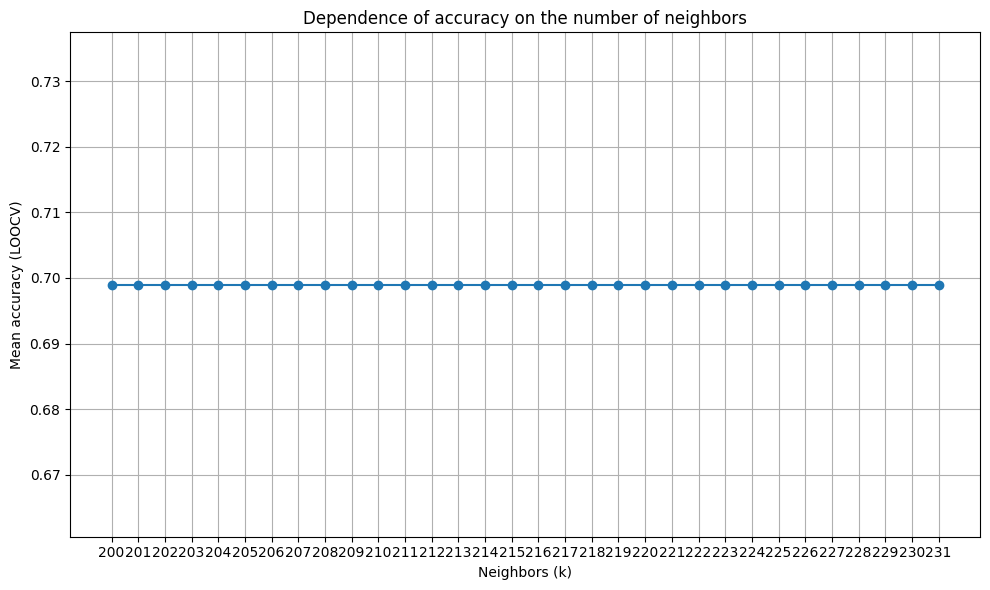

In [33]:
### Ploting mean accuracies against values of k
plt.figure(figsize=(10, 6))
plt.plot(grid200_results['param_n_neighbors'], grid200_results['mean_test_score'], marker='o', linestyle='-')
plt.title('Dependence of accuracy on the number of neighbors')
plt.xlabel('Neighbors (k)')
plt.ylabel('Mean accuracy (LOOCV)')
plt.xticks(grid200_results['param_n_neighbors'])
plt.grid(True)
plt.tight_layout()

####<font color = forestgreen> \<Answer\> </font>

**F)** The plot is in the figure above.

**G)** The graph is stable for these values of $k$ at the level of 69.9%, which is exactly the proportion of 0-class in the sample. This means that the model acts in a trivial way always predicting the majoritary class.
Perhaps, this, in turn, means that the classes are well mixed in the dataset and there are no clusters of 1-class that would be big enough to make the model predict 1 (in any 200-neighborhood there are less than 100 objects of label 1).
In this case, one may be sure that further increasing of $k$ will not yield any better result.

<!-- END  -->

______________
## <font color = lightcoral>4.  Data Loading and Initial Exploration for (Prostate Cancer) dataset </font>


We begin by introducing the <font color = lightcoral>prostate cancer dataset</font>, which will be used for our regression task. Our primary goal is to *predict the level of prostate-specific antigen (PSA)*, represented by the `lpsa` variable, using other relevant features as predictors.

Here's a brief overview of the features in our dataset:

| Feature | Type | Explanation |
| :- | :- | :-
| lcavol | numeric | log cancer volume
| lweight | numeric | log prostate weight
| age | numeric | patient's age
| lbph | numeric | log of benign prostatic hyperplasia amount
| svi | boolean | seminal vesicle invasion (0=no, 1=yes)
| lcp | numeric | log of capsular penetration
| gleason | numeric | Gleason score
| pgg45 | numeric | percentage of Gleason score 4+5
| lpsa | numeric | log PSA level (target variable)

Ensure that the `prostate.csv` file is located in the correct path (as specified in the code) for the code to execute correctly.

####**Exercise 4 A)**

Load the prostate dataset and display summary statistics (mean, std, min, max) for all numeric variables.




In [3]:
#  Load prostate data
cancer_data = pd.read_csv('prostate.csv')

#  Display the first 5 rows of the cancer data
display(cancer_data.head(5))

#  Display the number of unique values per column
print("\nThe numbers of unique values:")
display(cancer_data.nunique())

#  Display summary statistics of the dataset
print("\nBasic statistics:")
display(cancer_data.select_dtypes(exclude='bool').describe().round(2))

#  Counting values of svi
print("\nThe numbers of both values of svi:")
display(cancer_data['svi'].value_counts())

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564



The numbers of unique values:


,0
lcavol,93
lweight,88
age,31
lbph,42
svi,2
lcp,30
gleason,4
pgg45,19
lpsa,85



Basic statistics:


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.00,97.00,97.00,97.00,97.00,97.00,97.00,97.00,97.00
mean,1.35,3.63,63.87,0.10,0.22,-0.18,6.75,24.38,2.48
std,1.18,0.43,7.45,1.45,0.41,1.40,0.72,28.20,1.15
min,-1.35,2.37,41.00,-1.39,0.00,-1.39,6.00,0.00,-0.43
25%,0.51,3.38,60.00,-1.39,0.00,-1.39,6.00,0.00,1.73
50%,1.45,3.62,65.00,0.30,0.00,-0.80,7.00,15.00,2.59
75%,2.13,3.88,68.00,1.56,0.00,1.18,7.00,40.00,3.06
max,3.82,4.78,79.00,2.33,1.00,2.90,9.00,100.00,5.58



The numbers of both values of svi:


,count
svi,
0,76
1,21


----------

####**Exercise 4 B)**

Plot pairwise relationships between the `lpsa` variable and all other features using `seaborn.pairplot` with the following parameters: `kind="reg"`, `diag_kind="kde"`, and `plot_kws={"line_kws": {"color": "red"}}`. You should **not** include the 'svi' variable in the analysis since it has only two values (0 or 1) and is binary.



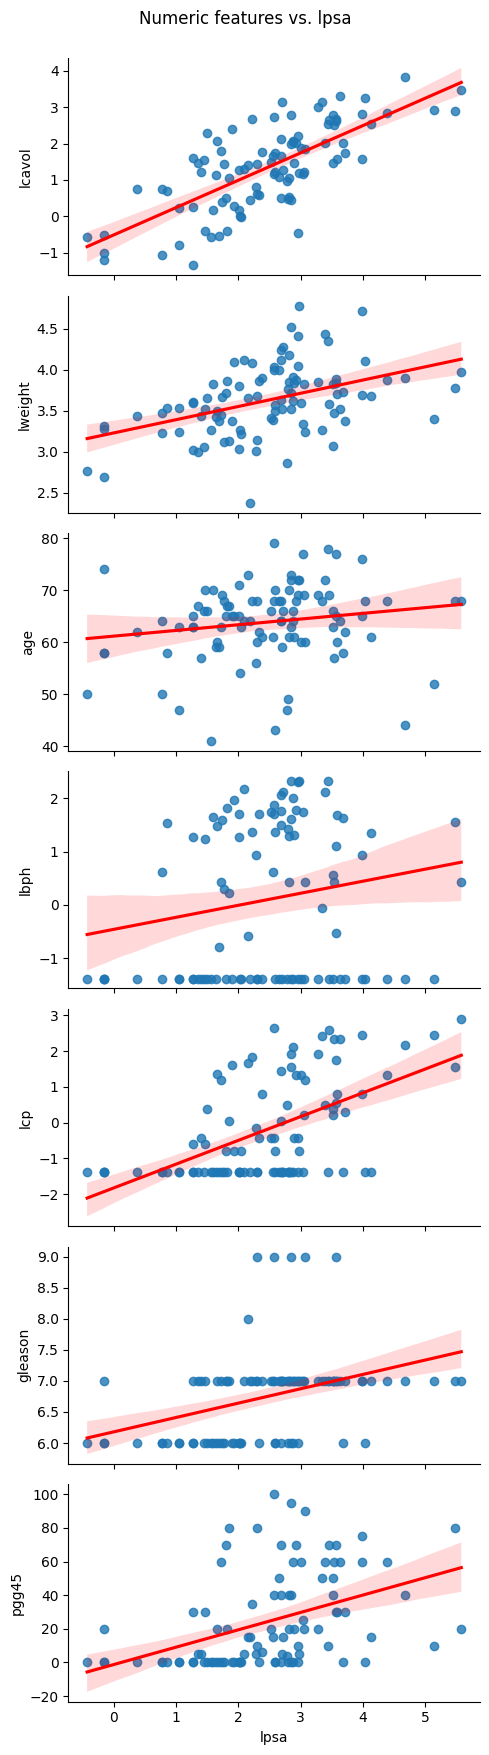

In [44]:
#  Select numeric columns from cancerData
# numeric_features = ['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'gleason', 'pgg45', 'lpsa']

#  Remove 'lpsa' and 'svi' from the feature list
features_for_pairplot = ['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'gleason', 'pgg45']

#  Create the pairplot
lpsa_pairplot = sns.pairplot(cancer_data,
             x_vars = ['lpsa'],
             y_vars = features_for_pairplot,
             kind = "reg",
             diag_kind = "kde",
             aspect = 2,
             plot_kws = {"line_kws": {"color": "red"}})
#  Add a title to the figure
lpsa_pairplot.fig.suptitle('Numeric features vs. lpsa', y=1)

plt.tight_layout()
plt.show()

______________
## <font color = royalblue> 5. Ridge Regression </font>


Having explored the relationships within our data, we are now ready to delve into regression modeling. This section will focus on <font color = royalblue>Ridge Regression</font>, a powerful regularization technique for predicting continuous outcomes. Our objective is to build a Ridge Regression model that can accurately estimate `lpsa` levels based on the other features in the dataset.

Before we train our model, it's crucial to prepare the data appropriately. This involves splitting the dataset into training and testing sets, and standardizing features to ensure optimal model performance, especially for regularization techniques like Ridge Regression.

####**Exercise 5 A)**

1. Separate the features (X) from the target variable (`lpsa`).

2. Split the data into training (80%) and testing (20%) sets using `train_test_split(X, y, test_size=0.2, random_state=2025, shuffle=True)`. Set a `random_state` for reproducibility.

3. Standardize the features for both the training and testing sets using `StandardScaler()`.





In [4]:

#  Import necessary packages


num_features = ['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'gleason', 'pgg45']

#  Separate X and y
cancer_features = cancer_data[num_features + ['svi']]
cancer_labels = cancer_data['lpsa']

#  Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(cancer_features,
                                                    cancer_labels,
                                                    random_state=2025,
                                                    test_size=0.2,
                                                    train_size=0.8,
                                                    shuffle=True)

#  Standardize features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_features] = (X_train_scaled[num_features].astype(float))
X_test_scaled[num_features] = (X_test_scaled[num_features].astype(float))

scaler2 = StandardScaler()
scaler2.fit(X_train_scaled[num_features])
X_train_scaled[num_features] = scaler2.transform(X_train_scaled[num_features])
X_test_scaled[num_features] = scaler2.transform(X_test_scaled[num_features])

#  Print results
print("X_train shape: ", X_train_scaled.shape)
display(X_train_scaled.head(5))
print("\nX_test shape: ", X_test_scaled.shape)
display(X_test_scaled.head(5))



X_train shape:  (77, 8)


,lcavol,lweight,age,lbph,lcp,gleason,pgg45,svi
44,0.081243,-0.451504,0.265238,1.138500,-0.217441,0.242028,-0.254136,0
46,1.176511,0.954373,2.059179,1.230638,2.028365,2.904332,2.468436,1
90,1.633982,1.209593,0.541229,-1.079265,-0.912458,-1.089125,-0.934779,0
26,-0.777281,0.292656,0.127243,-1.079265,-0.484915,0.242028,1.447472,0
0,-1.741059,-1.987155,-1.942690,-1.079265,-0.912458,-1.089125,-0.934779,0



X_test shape:  (20, 8)


,lcavol,lweight,age,lbph,lcp,gleason,pgg45,svi
66,0.554673,0.673704,0.541229,1.162684,1.057316,0.242028,1.447472,0
60,-0.826147,2.223749,1.231207,1.546689,-0.912458,-1.089125,-0.934779,0
87,0.297803,-0.548623,-0.286744,-1.079265,0.314190,0.242028,0.086185,1
51,0.234714,1.528736,-0.010753,1.367648,-0.912458,-1.089125,-0.934779,0
48,0.310205,-0.239102,-2.908658,-1.079265,-0.912458,-1.089125,-0.934779,0


In [47]:
X_train_scaled.describe().round(2)

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,svi
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.21
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,0.41
min,-2.42,-2.93,-3.18,-1.08,-0.91,-1.09,-0.93,0.00
25%,-0.68,-0.62,-0.42,-1.08,-0.91,-1.09,-0.93,0.00
50%,0.06,0.00,0.13,0.21,-0.34,0.24,-0.42,0.00
75%,0.71,0.61,0.54,0.99,0.95,0.24,0.77,0.00
max,2.14,2.84,2.06,1.55,2.03,2.90,2.47,1.00


----------

####**Exercise 5 B)**

Train a Ridge Regression model (with `Ridge(alpha=100, random_state=2025)`) using the scaled training data. Evaluate the model on both the training and testing sets using Mean Squared Error (MSE).

Look at the Test MSE and compare it with Training MSE what do you notice? is the model generalize well, and do you think that `alpha=100` is too strong?


In [48]:
#  Create Ridge model with alpha=100
ridge = Ridge(alpha = 100, random_state = 2025)

#  Fit the model
ridge.fit(X_train_scaled, y_train)

#  Predict on training and test data
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

#  Print evaluation results
print("MSE for the train set: ", round(mean_squared_error(y_train, y_train_pred), 4))
print("MSE for the test set: ", round(mean_squared_error(y_test, y_test_pred), 4))

MSE for the train set:  0.6242720728553439
MSE for the test set:  0.7808699440815187


####<font color = royalblue> \<Answer\> </font>

MSE is 0.62 for the train dataset and it is larger for the test dataset (0.78).
Keeping in mind the target variable range (-0.43, 5.58) and IQR = 1.33 (see Exercise 4A), we can estimate the error as significant for both cases. That is, the model doesn't generalize very well.

This may mean that the model is underfitted. So, the value of alpha may be too large.
I think, if the model were overfitted, the difference between those two errors would be greater.

<!-- END -->

____________
## <font color = forestgreen> 6. Hyperparameter Tuning with Cross-Validation </font>



Selecting the optimal hyperparameters is crucial for maximizing ML model performance. This is where <font color = forestgreen>hyperparameter tuning</font> comes into play, often coupled with <font color = forestgreen>cross-validation</font> to ensure robust and reliable model selection.

Cross-validation helps us estimate how well a model will perform on unseen data, providing a more stable evaluation than a single train–test split—especially when fine-tuning hyperparameters. In this section, we will use K-Fold cross-validation to identify the best `alpha` (regularization strength) for our Ridge Regression model.

Before tuning hyperparameters, it is important to remember the purpose of the data split:

* **Training set:** used to fit (train) the model.

* **Validation** (via **cross-validation**): used to evaluate model performance during tuning **without** touching the test set.

* **Test set:** used only once at the very end to estimate final model performance **after** all tuning decisions are complete.

Using the test set during hyperparameter tuning would lead to overly optimistic results.
Therefore, we rely on K-Fold cross-validation applied to the training data to select hyperparameters in a robust and unbiased way.

---

####**Exercise 6 A)**

Perform K-Fold cross-validation (e.g., with 5 folds) to find the optimal `alpha` value for Ridge Regression from a predefined range of `alphas` (e.g., `np.logspace(-2, 10, num=13)`). Plot the training MSE and cross-validation MSE against the `alpha` values. Highlight the `alpha` value that yields the lowest cross-validation MSE.
Use a logarithmic x-axis (`plt.xscale('log')`) for the `alpha` values.

* What is the optimal `alpha` value found, and how does it compare to `alpha=100` used in the previous question?


---

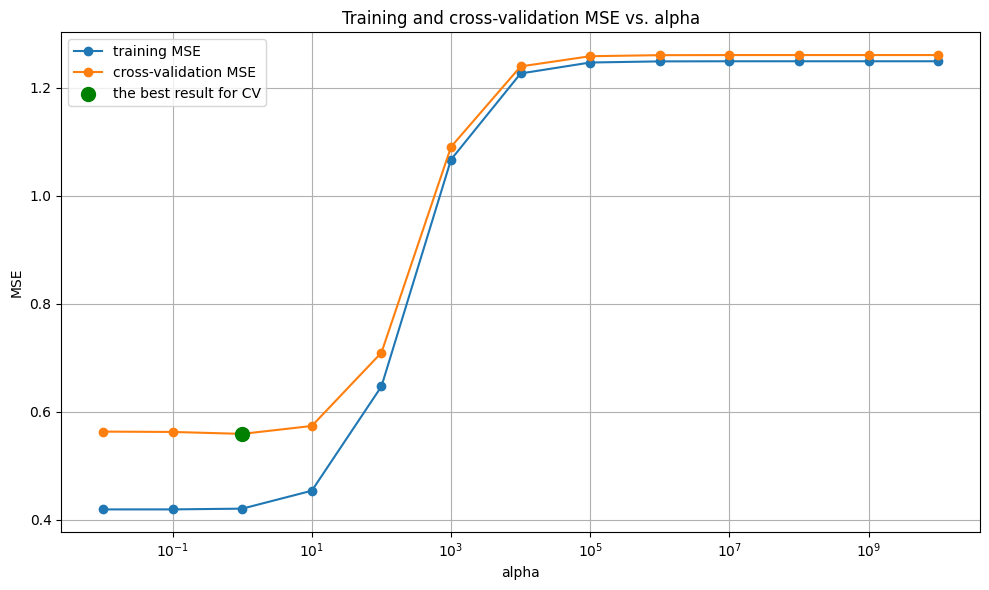

The best alpha:  1.0 which yields the CV MSE of 0.5590143261835584


In [7]:
#  Define alphas
alphas = np.logspace(-2, 10, num=13)

#  Create lists to store MSE values
train_mse = []
cv_mse = []

#  Create KFold object
k = 5
kf = KFold(n_splits = k, shuffle = True, random_state = 2025)

#  Loop over each alpha and compute train MSE and CV MSE
for alpha in alphas:
    ridge = Ridge(alpha = alpha, random_state = 2025)
    train_mse_alpha = 0
    cv_mse_alpha = 0
    for train_index, valid_index in kf.split(X_train_scaled):
        X_tr = X_train_scaled.iloc[train_index]   # current split
        X_v = X_train_scaled.iloc[valid_index]
        y_tr = y_train.iloc[train_index]
        y_v = y_train.iloc[valid_index]
        ridge.fit(X_tr, y_tr)                     # training the model
        y_tr_pred = ridge.predict(X_tr)
        y_v_pred = ridge.predict(X_v)
        train_mse_alpha += mean_squared_error(y_tr, y_tr_pred)
        cv_mse_alpha += mean_squared_error(y_v, y_v_pred)
    train_mse.append(train_mse_alpha / k)         # calculating the mean error
    cv_mse.append(cv_mse_alpha / k)

#  Plot training and CV MSE vs alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_mse, marker = 'o', linestyle = '-', label = 'training MSE')
plt.plot(alphas, cv_mse, marker = 'o', linestyle = '-', label = 'cross-validation MSE')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Training and cross-validation MSE vs. alpha')
plt.grid(True)


#  Identify and mark the best alpha
best_index = np.argmin(cv_mse)
best_alpha = alphas[best_index]
plt.scatter(best_alpha, cv_mse[best_index], color = "green", s = 100, zorder = 5, label = "the best result for CV")

plt.legend()
plt.tight_layout()
plt.show()
print("The best alpha is", best_alpha, "which yields the CV MSE of", cv_mse[best_index])

<font color = forestgreen> \<Answer\> </font>

The optimal `alpha` value is $1 = 10^0$. After this value the error starts growing. The same holds for the training MSE.
It provides slightly better performance than when `alpha`= 100.

<!-- END -->

----------

####**Exercise 6 B)**

Train the Ridge Regression model again using the optimal `alpha` value found in Exercise 6 A). Print the Mean Squared Error (MSE) for both the training and test sets, and compare the results with the previous model you trained with `alpha=100` in Exercise 5 B).




In [9]:
#  Create Ridge model using best_alpha
ridge1 = Ridge(alpha = best_alpha, random_state = 2025)

#  Fit model to the training data
ridge1.fit(X_train_scaled, y_train)

#  Predict on training and test sets
y_train_pred1 = ridge1.predict(X_train_scaled)
y_test_pred1 = ridge1.predict(X_test_scaled)

#  Print evaluation results
print("MSE for the train set: ", round(mean_squared_error(y_train, y_train_pred1), 4))
print("MSE for the test set: ", round(mean_squared_error(y_test, y_test_pred1), 4))

MSE for the train set:  0.4328
MSE for the test set:  0.5638


<font color = forestgreen> \<Answer\> </font>

MSE of the Ridge Regression models:

|           | `alpha`= 1 | `alpha`= 100 |
|----------:|:----------:|:------------:|
| train set |  0.4328    |  0.6243      |
| test set  |  0.5638    |  0.7809      |

So, `alpha`= 1 yields about 1.5 times lower MSE than `alpha`= 100. It supports the previous suggestion that with `alpha`= 100 the model got underfitted.



<!-- END -->

_____________________

## <font color = darkorange> 7. Bonus Exercise </font>


You can stop here and get the "pass" grade! To get the pass with honors, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain what you did and especially ***why*** you did it. Please note that submitting only code will not be awarded a pass with honors.

----------------

####**Exercise 7 A)**

Using the Ridge Regression model with the optimal `alpha` found in Exercise 6 A, write out the complete regression equation, including the intercept and the coefficients for each feature.

- What does the intercept term represent in this model?

- Which feature has the largest coefficient? What does this tell you about its importance? you can plot the features importance based on the coefficients and Sort by absolute coefficient value for better visualization

Which of the following statements best describes the role of a positive coefficient for `lcavol` in the Ridge Regression model predicting `lpsa`?

A) An increase in `lcavol` is associated with a decrease in predicted `lpsa`.

B) `lcavol` has no influence on predicted `lpsa`.

C) An increase in `lcavol` is associated with an increase in predicted `lpsa`.

D) The model is not well-fitted if `lcavol` has a positive coefficient.



In [22]:
### Code - Ridge Regression Equation

# Re-fit the best Ridge model using the optimal alpha found in Exercise 3 A

# Let's write the equation


In [23]:
### Code - Visualize Coefficients

# Create a DataFrame for easier plotting

# Sort by absolute coefficient value for better visualization

# Create horizontal bar plot



----------

####**Exercise 7 B)**

**Regularization Path Analysis**

Visualize how coefficients change as the regularization strength (alpha) varies. This is called a regularization path or coefficient path.

1. Train Ridge Regression models for a range of alpha values (e.g., `np.logspace(-2, 4, num=50)`)

2. For each alpha, extract the coefficients

3. Plot the coefficient paths: each feature's coefficient value vs. log(alpha)

4. Add a vertical line at the optimal alpha found.

- Which of the following best describes what happens to Ridge Regression coefficients as alpha approaches infinity?

    A) All coefficients approach infinity

    B) All coefficients approach zero

    C) Coefficients remain unchanged

    D) Coefficients become random

- If a feature's coefficient changes dramatically as alpha increases, what does this suggest about that feature?

    A) The feature is not important

    B) The feature may be contributing to overfitting

    C) The feature has no correlation with the target
    
    D) The feature should be removed




In [24]:
### Code - Regularization Path Analysis

# Define a range of alpha values

# Plot coefficient paths

# Add vertical line at optimal alpha


----------

####**Exercise 7 C)**

**Comparison with Lasso Regression**

This exercise focuses on comparing **Ridge Regression ($\text{L}_2$ regularization)** and **Lasso Regression ($\text{L}_1$ regularization)** to understand the practical differences between the two regularization techniques.

---
Coding Tasks:

1.  **Import:** Import the `Lasso` class from `sklearn.linear_model`.

2.  **Lasso Training (Fixed Alpha):** Train a Lasso model using the previously defined training test split in 5A) `X_train_scaled` and `y_train` with a fixed regularization parameter, $\alpha = 0.1$.

3.  **Coefficient Comparison (Fixed Alpha):** Compare the coefficients of the previously optimized Ridge Model (using its best $\alpha$) with the coefficients of the **Lasso Model** trained with $\alpha=0.1$.

4.  **Coefficient Visualization (Fixed Alpha):** Create a visualization (e.g., a bar chart) to display the coefficients of both models side-by-side.

5.  **Performance Comparison (Fixed Alpha):** Compare the test set performance metrics (Mean Squared Error (MSE) and **$\text{R}^2$**) for both models on `X_test_scaled` and `y_test`

6.  **Optimal Alpha Search (Lasso):** Perform hyperparameter tuning for Lasso Regression (similar to the method used for Ridge Regression, e.g., using cross-validation on the range `alphas_lasso = np.logspace(-4, 1, num=20)`) to find the optimal $\alpha$ value.

7.  **Final Coefficient Visualization (Optimal Alpha):** Train the Lasso model using its best $\alpha$ and visualize its final coefficients side-by-side with the pervious ridge regression model that trained with its best $\alpha$.

---

Answer the following questions based on your results:

* What effect did training with Lasso $\alpha=0.1$ have on the model's coefficients? Were any coefficients driven to exactly zero? If so, which features did this affect?

* Was the Lasso Test MSE (with $\alpha=0.1$) better or worse than the Ridge Test MSE(with its best $\alpha$)?

* What was the best alpha value for Lasso Regression determined through cross-validation?

* After training both the Ridge and Lasso models with their respective optimal $\alpha$ values, is there any significant difference in the resulting coefficient values?




In [25]:
### Code - Comparison with Lasso Regression

from sklearn.linear_model import Lasso

# Find optimal alpha for Lasso using cross-validation

# Train final models for ridge and lasso with the best alpha values

# Compare coefficients

# Visualize coefficients side-by-side

# Compare test set performance
